In [1]:
import matplotlib.pyplot as plt
import osmnx as ox
from osmnx.simplification import simplify_graph
from utils import assign_edge_colors
import networkx as nx
from matplotlib.lines import Line2D


In [2]:
lat1, lon1 = 35.71643109802673, 51.34974663404765
lat2, lon2 = 35.712445786680625, 51.35525105737604

graph = ox.graph_from_bbox((lon1, lat2, lon2, lat1), simplify=False, network_type="drive")
simplified_graph = simplify_graph(graph)

In [3]:
# Color Settings
BG_COLOR = (0,0,0)
NODE_COLOR = "w"
EDGE_COLORS = ["g", "b", "r","c"]

# Size
NODE_SIZE= 15
EDGE_LW = 3
 


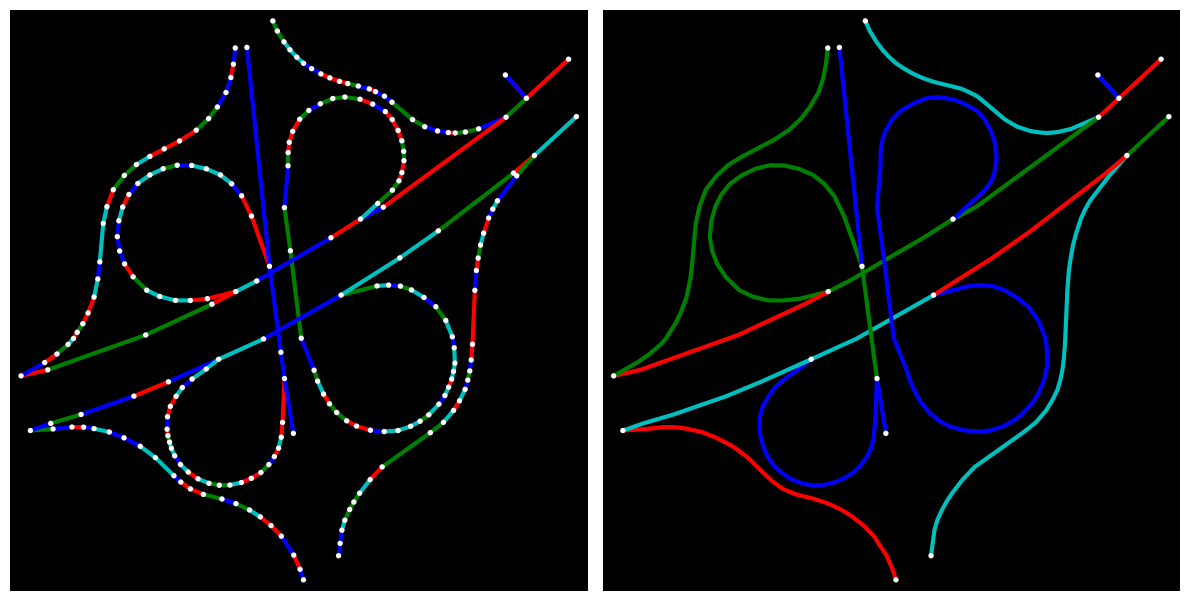

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,7), frameon=False)

for ax in axes:
    ax.set_facecolor(BG_COLOR)

graph_edge_colors = assign_edge_colors(graph, EDGE_COLORS)
simplified_graph_edge_colors = assign_edge_colors(simplified_graph, EDGE_COLORS)

fig, axes[0] = ox.plot_graph(graph, ax=axes[0], edge_color=graph_edge_colors, node_color=NODE_COLOR, node_size=NODE_SIZE, edge_linewidth=EDGE_LW, close=False, show=False) 
fig, axes[1] = ox.plot_graph(simplified_graph, ax=axes[1], edge_color=simplified_graph_edge_colors, node_color=NODE_COLOR, node_size=NODE_SIZE, edge_linewidth=EDGE_LW, close=False, show=False)

# axes[0].set_title("Raw OSM graph (Before Simplification)")
# axes[1].set_title("After Simplification")
plt.tight_layout()
plt.savefig("outputs//before_after.png", dpi=300)
plt.show() 

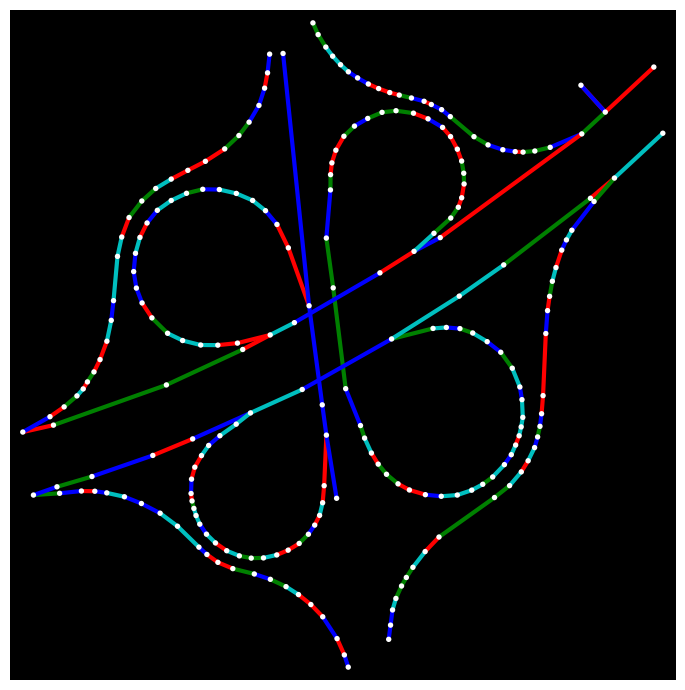

In [5]:
fig, ax = plt.subplots(figsize=(10,7), frameon=False)
ax.set_facecolor(BG_COLOR)
ox.plot_graph(graph, edge_color=graph_edge_colors, ax=ax, node_color=NODE_COLOR, node_size=NODE_SIZE, edge_linewidth=EDGE_LW, close=False, show=False) 
plt.tight_layout()
plt.savefig("outputs//before.png", dpi=300)

In [6]:
from osmnx.simplification import _is_endpoint

endpoints = {n for n in graph.nodes if _is_endpoint(graph, n, None, None)}


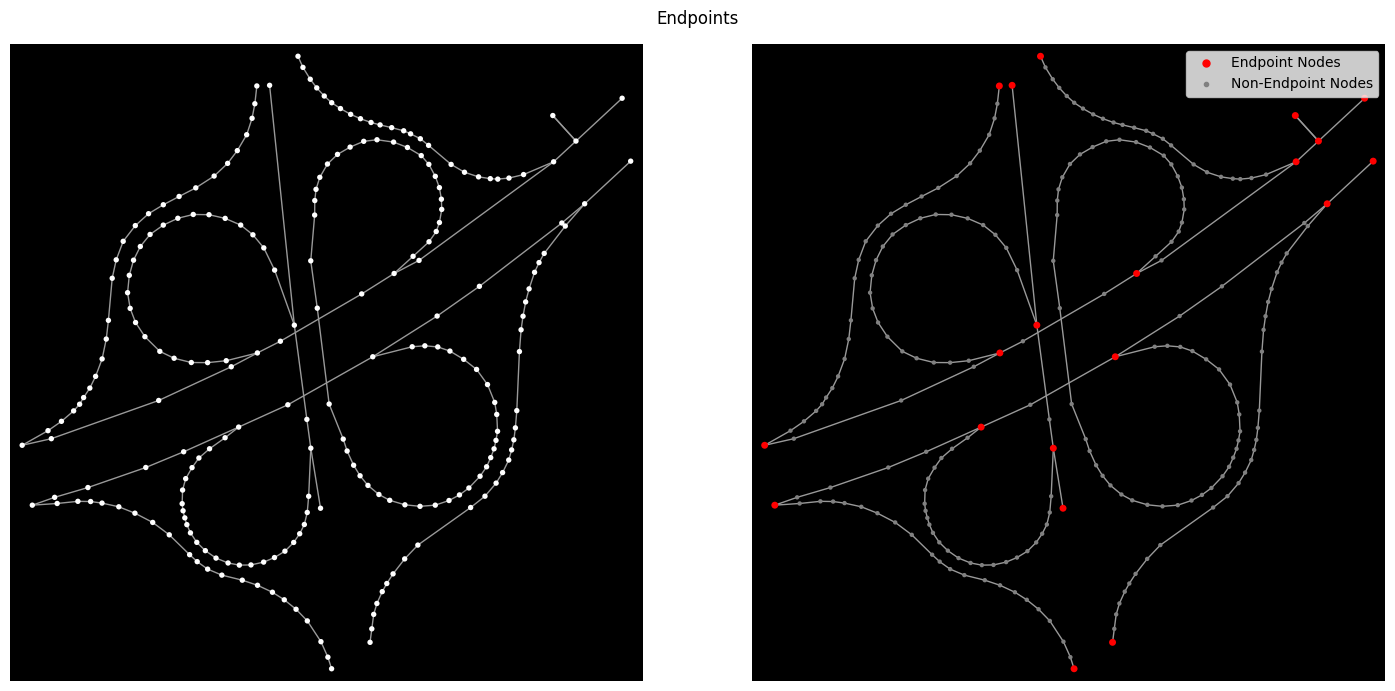

In [7]:
fig, axes = plt.subplots(figsize=(15,7), frameon=False, ncols=2)

for ax in axes:
    ax.set_facecolor(BG_COLOR)

node_size = [25 if node in endpoints  else 10 for node in graph.nodes()]
node_color = ["red" if node in endpoints  else "grey" for node in graph.nodes()]



fig, axes[1] = ox.plot_graph(graph, ax=axes[1], show=False, close=False, node_size=node_size, node_color=node_color)
fig, axes[0] = ox.plot_graph(graph, ax=axes[0], show=False, close=False)

legned_elements = [
    Line2D([0],[0], marker="o", markerfacecolor="red", ls=" ", color="red", label="Endpoint Nodes", markersize=5),
    Line2D([0],[0], marker="o", markerfacecolor="grey", ls=" ", color="grey", label="Non-Endpoint Nodes", markersize=3)
]
axes[1].legend(handles=legned_elements)

fig.suptitle("Endpoints")
fig.tight_layout()
plt.savefig("outputs//endpoints.png", dpi=300)
plt.show()


In [8]:
from osmnx.simplification import _build_path, _get_paths_to_simplify


for index, path in enumerate(_get_paths_to_simplify(graph, None, None)):
    fig, ax = plt.subplots(figsize=(10,7), frameon=False)
    ax.set_facecolor(BG_COLOR)
    fig, ax = ox.plot_graph(graph, show=False, close=False, node_color=node_color, node_size=node_size, ax=ax)
    fig, ax = ox.plot_graph_route(graph, path, route_color="yellow", route_linewidth=5, ax=ax, show=False, close=False)
    fig.tight_layout()    
    fig.savefig(f"outputs//path_gif//{index}.png")
    plt.close(fig)

In [9]:
import imageio.v3 as iio
import os

def create_gif(path_gif, output_filename, duration=0.01):
    """
    Creates a looped GIF from PNG images in a folder.

    Args:
        path_gif: Path to the folder containing PNG images.
        output_filename: Name of the output GIF file.
        duration: Duration of each frame in seconds.
    """
    images = []
    filenames = sorted([f for f in os.listdir(path_gif) if f.endswith('.png')])
    for filename in filenames:
        filepath = os.path.join(path_gif, filename)
        images.append(iio.imread(filepath))

    output_path = os.path.join(path_gif, output_filename)
    iio.imwrite(output_path, images, fps=2, loop=0)

# Example usage:
path_gif = "outputs/path_gif"
output_filename = "animation.gif"
create_gif(path_gif, output_filename)


In [10]:
graph = ox.routing.add_edge_speeds(graph)
simplified_graph = ox.routing.add_edge_speeds(simplified_graph)

In [11]:
graph = ox.routing.add_edge_travel_times(graph)
simplified_graph = ox.routing.add_edge_travel_times(simplified_graph)

In [12]:
nodes_gdf, edges_gdf = ox.graph_to_gdfs(graph)

In [13]:
for edge in graph.edges():
    print(edge)
    print(graph.edges[*edge,0])
    



(26396131, 6467219275)
{'osmid': 4336587, 'highway': 'trunk_link', 'lanes': '1', 'oneway': True, 'reversed': False, 'length': 13.459827835133998, 'speed_kph': 47.1875, 'travel_time': 1.0268689845082362}
(26605130, 6467388520)
{'osmid': 4365079, 'highway': 'trunk_link', 'lanes': '1', 'oneway': True, 'reversed': False, 'length': 32.977893942665546, 'speed_kph': 47.1875, 'travel_time': 2.515929392182166}
(26605131, 6467388522)
{'osmid': 4365079, 'highway': 'trunk_link', 'lanes': '1', 'oneway': True, 'reversed': False, 'length': 9.067753813166526, 'speed_kph': 47.1875, 'travel_time': 0.6917915491899229}
(26605138, 2204547107)
{'osmid': 610007271, 'highway': 'trunk_link', 'lanes': '2', 'maxspeed': '80', 'oneway': True, 'reversed': False, 'length': 27.516489738363138, 'speed_kph': 80.0, 'travel_time': 1.238242038226341}
(26605139, 7296117150)
{'osmid': 610007271, 'highway': 'trunk_link', 'lanes': '2', 'maxspeed': '80', 'oneway': True, 'reversed': False, 'length': 45.214844939990094, 'speed_k

In [14]:
for edge in simplified_graph.edges():
    print(edge)
    print(simplified_graph.edges[*edge, 0])
    break

(26605138, 26605142)
{'osmid': 610007271, 'highway': 'trunk_link', 'lanes': '2', 'maxspeed': '80', 'oneway': True, 'reversed': False, 'length': 113.60371489269824, 'geometry': <LINESTRING (51.353 35.715, 51.353 35.715, 51.352 35.715, 51.352 35.714)>, 'speed_kph': 80.0, 'travel_time': 5.11216717017142}


In [15]:
edges_gdf

,,,osmid,highway,lanes,oneway,reversed,length,speed_kph,travel_time,maxspeed,name,ref,bridge,geometry
u,v,key,,,,,,,,,,,,,
26396131,6467219275,0,4336587,trunk_link,1,True,False,13.459828,47.18750,1.026869,NaN,NaN,NaN,NaN,"LINESTRING (51.35181 35.71445, 51.35166 35.71444)"
26605130,6467388520,0,4365079,trunk_link,1,True,False,32.977894,47.18750,2.515929,NaN,NaN,NaN,NaN,"LINESTRING (51.35248 35.71509, 51.35251 35.71539)"
26605131,6467388522,0,4365079,trunk_link,1,True,False,9.067754,47.18750,0.691792,NaN,NaN,NaN,NaN,"LINESTRING (51.35252 35.71556, 51.35255 35.71563)"
26605138,2204547107,0,610007271,trunk_link,2,True,False,27.516490,80.00000,1.238242,80,NaN,NaN,NaN,"LINESTRING (51.35314 35.71501, 51.35289 35.71488)"
26605139,7296117150,0,610007271,trunk_link,2,True,False,45.214845,80.00000,2.034668,80,NaN,NaN,NaN,"LINESTRING (51.35496 35.71614, 51.35459 35.71587)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6467465852,29365712,0,4623536,trunk_link,1,True,False,8.247557,30.00000,0.989707,30,NaN,NaN,NaN,"LINESTRING (51.35073 35.71354, 51.35082 35.71353)"
6467465853,311142518,0,4623536,trunk_link,1,True,False,12.452226,30.00000,1.494267,30,NaN,NaN,NaN,"LINESTRING (51.35095 35.71351, 51.35108 35.71346)"
7296117150,311141675,0,610007271,trunk_link,2,True,False,21.879951,80.00000,0.984598,80,NaN,NaN,NaN,"LINESTRING (51.35459 35.71587, 51.35441 35.71573)"


In [16]:
edge_index = 7
u, v = list(simplified_graph.edges())[edge_index]

simplified_graph.edges[*list(simplified_graph.edges())[edge_index], 0]

{'osmid': 4623536,
 'highway': 'trunk_link',
 'lanes': '1',
 'maxspeed': '30',
 'oneway': True,
 'reversed': False,
 'length': 262.1963237045064,
 'geometry': <LINESTRING (51.35 35.714, 51.35 35.714, 51.351 35.714, 51.351 35.714, 51.35...>,
 'speed_kph': 30.0,
 'travel_time': 31.46355884454077}

In [17]:
import networkx as nx
path = nx.shortest_path(graph, u, v, weight='length')
len(path)

22

In [18]:
for first_node, second_node in zip(path[:-1],path[1:]):
    print(graph.edges[(first_node, second_node,0)])

{'osmid': 4623536, 'highway': 'trunk_link', 'lanes': '1', 'maxspeed': '30', 'oneway': True, 'reversed': False, 'length': 17.890325032885485, 'speed_kph': 30.0, 'travel_time': 2.1468390039462584}
{'osmid': 4623536, 'highway': 'trunk_link', 'lanes': '1', 'maxspeed': '30', 'oneway': True, 'reversed': False, 'length': 14.967907031275482, 'speed_kph': 30.0, 'travel_time': 1.7961488437530577}
{'osmid': 4623536, 'highway': 'trunk_link', 'lanes': '1', 'maxspeed': '30', 'oneway': True, 'reversed': False, 'length': 9.146947820598164, 'speed_kph': 30.0, 'travel_time': 1.0976337384717798}
{'osmid': 4623536, 'highway': 'trunk_link', 'lanes': '1', 'maxspeed': '30', 'oneway': True, 'reversed': False, 'length': 8.247557095451983, 'speed_kph': 30.0, 'travel_time': 0.9897068514542379}
{'osmid': 4623536, 'highway': 'trunk_link', 'lanes': '1', 'maxspeed': '30', 'oneway': True, 'reversed': False, 'length': 12.35128865779044, 'speed_kph': 30.0, 'travel_time': 1.4821546389348526}
{'osmid': 4623536, 'highway'

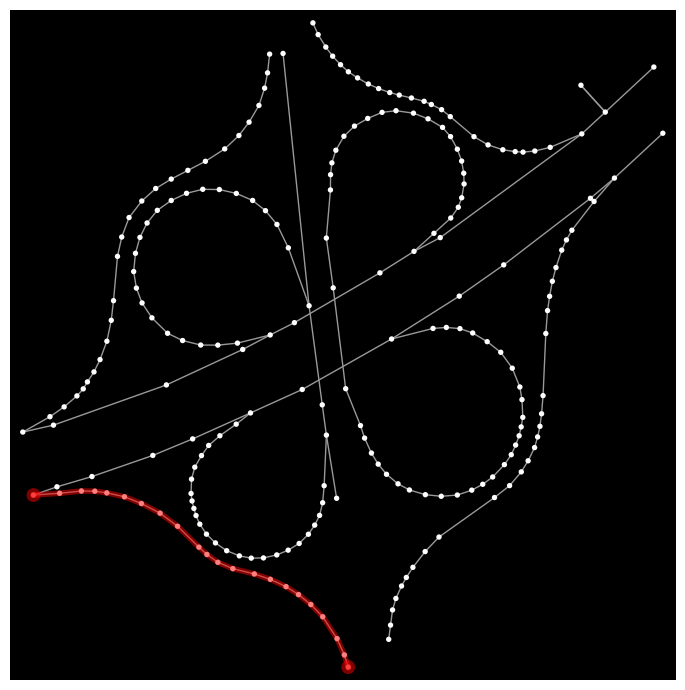

In [19]:
fig, ax = plt.subplots(figsize=(7,7), frameon=False)
ax.set_facecolor(BG_COLOR)
fig, ax = ox.plot_graph(graph, ax=ax, close=False, show=False)
fig, ax = ox.plot_graph_route(graph, route=path, ax=ax, close=False, show=False)
fig.tight_layout()
fig.savefig("outputs//sample_route1.png")
plt.show()

In [20]:
list(simplified_graph.edges())[edge_index]

(29365711, 6467465830)